In [ ]:
import cv2
import sys
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


샤프닝 필터

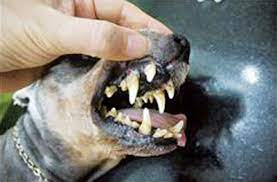

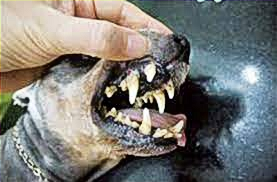

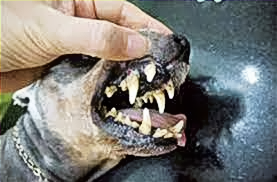

In [339]:
# 1

src = cv2.imread('/content/gdrive/MyDrive/강아지_0.jpg')

alpha = 2.0

if src is None:
    print('Image load failed!')
    sys.exit()
    
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # BGR -> YCrCb 전환

# Y 성분만 추출
src_f = src_ycrcb[:, :, 0].astype(np.float32) # split 대신 슬라이싱 사용
blr = cv2.GaussianBlur(src_f, (0, 0), alpha)
src_ycrcb[:, :, 0] = np.clip((src_f + ((src_f - blr) * alpha)), 0, 255).astype(np.uint8) # 중간 연산은 실수가 좋고 최종 형태는 unit8로 하는게 좋음

src_xcrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # BGR -> YCrCb 전환

# X(?) 성분만 추출
src_f = src_xcrcb[0, :, :].astype(np.float32) # split 대신 슬라이싱 사용
blr = cv2.GaussianBlur(src_f, (0, 0), alpha)
src_xcrcb[0, :, :] = np.clip((src_f + ((src_f - blr) * alpha)), 0, 255).astype(np.uint8) # 중간 연산은 실수가 좋고 최종 형태는 unit8로 하는게 좋음

src_zcrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # BGR -> YCrCb 전환

# Z(?) 성분만 추출
src_f = src_zcrcb[:, 0, :].astype(np.float32) # split 대신 슬라이싱 사용
blr = cv2.GaussianBlur(src_f, (0, 0), alpha)
src_zcrcb[:, 0, :] = np.clip((src_f + ((src_f - blr) * alpha)), 0, 255).astype(np.uint8) # 중간 연산은 실수가 좋고 최종 형태는 unit8로 하는게 좋음

dst1 = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)
dst2 = cv2.cvtColor(src_xcrcb, cv2.COLOR_YCrCb2BGR)
dst3 = cv2.cvtColor(src_zcrcb, cv2.COLOR_YCrCb2BGR)

dst = ((dst1/3 + dst2/3 + dst3/3)).astype(np.uint8)
test_bilatera = cv2.bilateralFilter(dst, -1, 10, 5)

cv2_imshow(src)
cv2_imshow(dst)
cv2_imshow(test_bilatera)
cv2.waitKey()

cv2.destroyAllWindows()

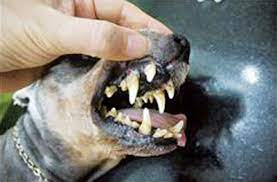

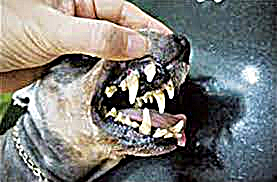

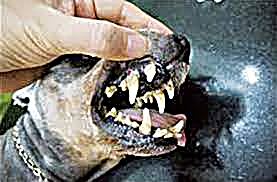

In [374]:
# 2

src = cv2.imread('/content/gdrive/MyDrive/강아지_0.jpg')

if src is None:
    print('Image load failed!')
    sys.exit()

blr = cv2.GaussianBlur(src, (0, 0), 2) # 표준편차 2, 필터 크기는 자동 설정

alpha = 2.0
#test_parameter = 1.1

dst1 = np.clip((1+alpha)*src - (alpha * blr) , 0, 255).astype(np.uint8) # 계산은 정수, 출력은 실수
#dst2 = np.clip((1+alpha)*src - (alpha * test_parameter * blr) , 0, 255).astype(np.uint8)
test_bilatera = cv2.bilateralFilter(dst1, -1, 10, 5)

cv2_imshow(src)
cv2_imshow(dst1)
#cv2_imshow(dst2)
cv2_imshow(test_bilatera + test3)
cv2.waitKey()

cv2.destroyAllWindows()

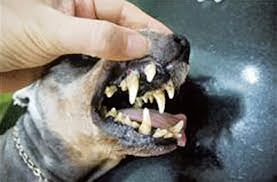

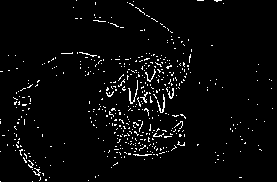

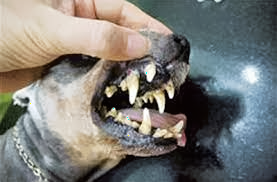

In [369]:
# outline test

image = cv2.imread('/content/gdrive/MyDrive/강아지_0.jpg')

# 커널 생성(대상이 있는 픽셀을 강조)
kernel = np.array([[-1, -1, -1],
                   [-1,8, -1],
                   [-1, -1, -1]])

# 커널 적용 
image_sharp = cv2.filter2D(blr, -1, kernel)
test1 = np.clip(image_sharp,127,255)
test2 = np.where(test1 <= 127,0,test1)
test3 = np.where(test2 >= 128,255,test2)

for i in range(test3.shape[0]):
  for j in range(test3.shape[1]):
    for k in range(3):
      if(test3[i][j][k] != 255):
        test3[i][j] = [0,0,0]
        break

test4 = 255 - test3


cv2_imshow(blr)
cv2_imshow(test3)
cv2_imshow(blr - test3)


Gaussian filter

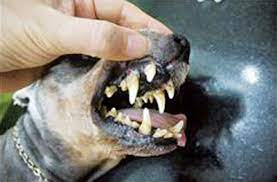

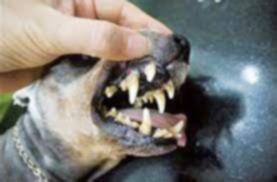

In [298]:
src = cv2.imread('/content/gdrive/MyDrive/강아지_0.jpg')

alpha = 1.0

if src is None:
    print('Image load failed!')
    sys.exit()
    
#src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb) # BGR -> YCrCb 전환

# Y 성분만 추출
#src_f = src_ycrcb[:, :, 0].astype(np.float32) # split 대신 슬라이싱 사용
blr = cv2.GaussianBlur(src, (0, 0), alpha)
#src_ycrcb[:, :, 0] = np.clip(blr, 0, 255).astype(np.uint8) # 중간 연산은 실수가 좋고 최종 형태는 unit8로 하는게 좋음

#dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2_imshow(src)
cv2_imshow(blr)
cv2.waitKey()

cv2.destroyAllWindows()

Test Cut

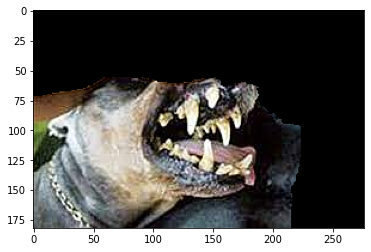

In [ ]:
image_bgr = dst
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# 사각형 좌표: 시작점의 x,y  ,넢이, 너비 - > detecting?
#rectangle = (0, 56, 256, 150)

# 초기 마스크 생성
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# grabCut에 사용할 임시 배열 생성
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# grabCut 실행
cv2.grabCut(image_rgb, # 원본 이미지
           mask,       # 마스크
           rectangle,  # 사각형
           bgdModel,   # 배경을 위한 임시 배열
           fgdModel,   # 전경을 위한 임시 배열 
           5,          # 반복 횟수
           cv2.GC_INIT_WITH_RECT) # 사각형을 위한 초기화
# 배경인 곳은 0, 그 외에는 1로 설정한 마스크 생성
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# 이미지에 새로운 마스크를 곱행 배경을 제외
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# plot
plt.imshow(image_rgb_nobg)
plt.show()